In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from scipy.interpolate import interp1d

In [2]:
def f(x):
    return 2 * x ** 2

In [3]:
def f1(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

In [4]:
def rect_method(f, x, n):
    h = (x[-1] - x[0]) / n
    s = 0
    for i in range(n):
        s += f(x[0] + h * (0.5 + i))
    return s * h

In [5]:
x = np.arange(0, 1.1, 0.1)
rect_method(lambda x: 1 / (1 + x ** 2), x, 10)

0.7856064962502747

In [6]:
def trap_method(f, x, n):
    h = (x[-1] - x[0]) / n
    s = 0
    for i in range(n):
        s += (f(x[i]) + f(x[i+1])) / 2
    return s * h

In [7]:
x = np.arange(0, 1.1, 0.1)
trap_method(lambda x: 1 / (1 + x ** 2), x, 10)

0.7849814972267897

In [8]:
def simps(f, x, n):
    h = (x[-1] - x[0]) / n
    s1 = 0
    s2 = 0
    
    for i in range(1, n):
        if i % 2:
            s1 += f(x[i])
        else:
            s2 += f(x[i])
    
    return h / 3 * (f(x[0]) + 4 * s1 + 2 * s2 + f(x[-1]))

In [9]:
x = np.arange(0, 1.1, 0.1)
simps(lambda x: 1 / (1 + x ** 2), x, 10)

0.7853981534848038

In [10]:
x = np.linspace(1, 10, 101)

In [11]:
n = 10
h = (x[-1] - x[0]) / n

xb = np.array([x[0] + h * (i + 0.5) for i in range(n)])

In [12]:
yb = f1(xb)

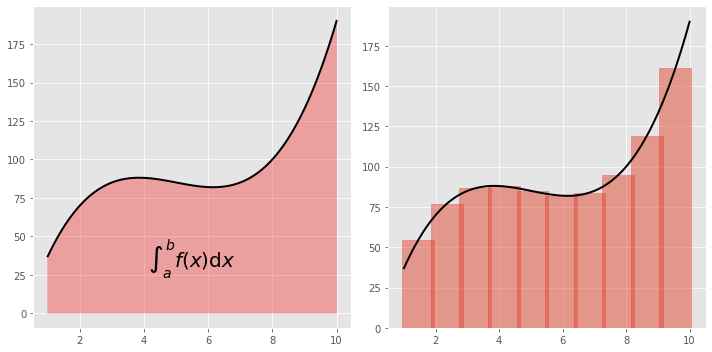

In [34]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))


# Make the shaded region
ix = np.linspace(x[0], x[-1])
iy = f1(ix)
verts = [(x[0], 0), *zip(ix, iy), (x[-1], 0)]
poly = Polygon(verts, facecolor='r', edgecolor='r', alpha=0.3)

ax[0].plot(x, f1(x), linewidth=2, c='k')
ax[0].add_patch(poly)

ax[0].text(0.5 * (x[0] + x[-1]), 30, r"$\int_{a}^{b} f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

ax[1].plot(x, f1(x), linewidth=2, c='k')
ax[1].bar(xb, yb, alpha=0.5, width=h, edgecolor='r')

plt.tight_layout()

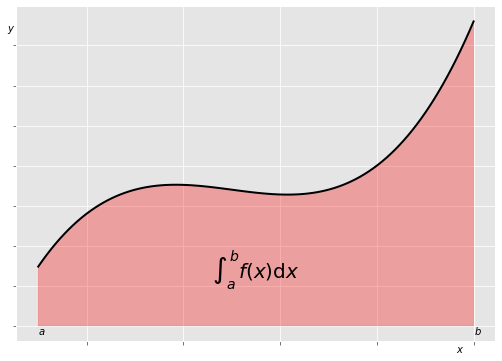

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))

# Make the shaded region
ix = np.linspace(x[0], x[-1])
iy = f1(ix)
verts = [(x[0], 0), *zip(ix, iy), (x[-1], 0)]
poly = Polygon(verts, facecolor='r', edgecolor='r', alpha=0.3)

ax.plot(x, f1(x), linewidth=2, c='k')
ax.add_patch(poly)

ax.text(0.5 * (x[0] + x[-1]), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)
ax.text(x[0], -5, r'$a$')
ax.text(x[-1], -5, r'$b$')

fig.text(0.9, 0.01, '$x$')
fig.text(0.01, 0.9, '$y$')

ax.set_xticklabels(())
ax.set_yticklabels(())

plt.tight_layout()
plt.savefig('int.svg')

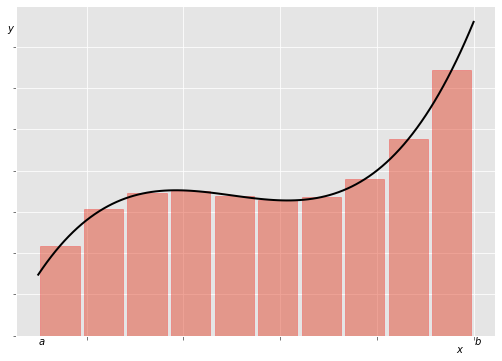

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(x, f1(x), linewidth=2, c='k')
ax.bar(xb, yb, alpha=0.5, width=h*0.9, edgecolor='r')

ax.text(x[0], -5, r'$a$')
ax.text(x[-1], -5, r'$b$')

fig.text(0.9, 0.01, '$x$')
fig.text(0.01, 0.9, '$y$')

ax.set_xticklabels(())
ax.set_yticklabels(())

plt.tight_layout()
plt.savefig('rect_method.svg')

In [16]:
s = rect_method(f, x, 100)

In [17]:
s

665.9878500000001

In [18]:
s1 = trap_method(f, x, 100)

In [19]:
s1

666.0242999999998

In [20]:
h = 1

In [21]:
x_tr = np.arange(x[0], x[-1]+h, h)

In [22]:
x_tr

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

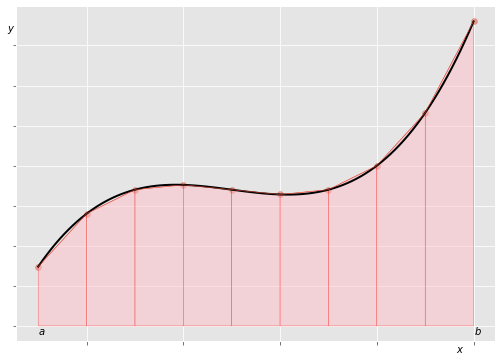

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(x, f1(x), linewidth=2, c='k')
plt.plot(x_tr, f1(x_tr), linewidth=0.5)

y_tr = f1(x_tr)

verts_list = []

for i in range(9):
    verts_list.append([(x_tr[i], 0), (x_tr[i], y_tr[i]), (x_tr[i+1], y_tr[i+1]), (x_tr[i+1], 0)])

for verts in verts_list:
    poly = Polygon(verts, facecolor='pink', edgecolor='r', alpha=0.5)
    plt.gca().add_patch(poly)

plt.scatter(x_tr, f1(x_tr), alpha=0.5)

ax.text(x[0], -5, r'$a$')
ax.text(x[-1], -5, r'$b$')

fig.text(0.9, 0.01, '$x$')
fig.text(0.01, 0.9, '$y$')

ax.set_xticklabels(())
ax.set_yticklabels(())

plt.tight_layout()
plt.savefig('метод трапеций.svg')

In [24]:
s2 = simps(f, x, 100)

In [25]:
s2

666.0

In [26]:
x_ = np.array([i for i in range(1, 11, 1)])
y_ = f1(x_)

In [27]:
quad_interp = interp1d(x_, y_, kind='quadratic', fill_value='extrapolate')

In [28]:
quad_interp(x_)

array([ 37.,  70.,  85.,  88.,  85.,  82.,  85., 100., 133., 190.])

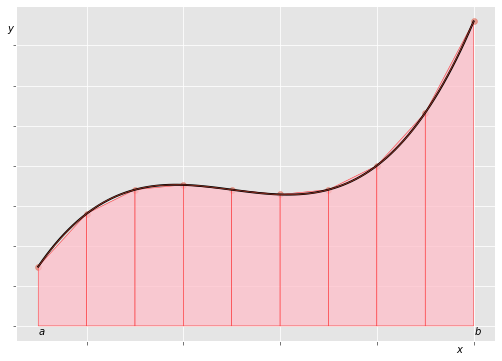

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(x, f1(x), linewidth=2, c='k')
ax.plot(x, quad_interp(x), linewidth=0.5)

for i in range(9):
    verts_list.append([(x_tr[i], 0), (x_tr[i], y_[i]), (x_tr[i+1], y_[i+1]), (x_tr[i+1], 0)])

for verts in verts_list:
    poly = Polygon(verts, facecolor='pink', edgecolor='r', alpha=0.5)
    plt.gca().add_patch(poly)

plt.scatter(x_tr, y_, alpha=0.5)

ax.text(x[0], -5, r'$a$')
ax.text(x[-1], -5, r'$b$')

fig.text(0.9, 0.01, '$x$')
fig.text(0.01, 0.9, '$y$')

ax.set_xticklabels(())
ax.set_yticklabels(())

plt.tight_layout()
plt.savefig('simpson.svg')

In [35]:
f = lambda i: 1 / (1 + (0.1 * (i + 0.5)) ** 2)

In [36]:
for i in range(10):
    print(f(i))

0.9975062344139651
0.9779951100244499
0.9411764705882353
0.8908685968819599
0.8316008316008315
0.7677543186180422
0.7029876977152899
0.64
0.5805515239477503
0.5256241787122208


In [39]:
sum(f(i) for i in range(10)) * 0.1

0.7856064962502747

In [41]:
trap_method(lambda x: 1 / (1 + x ** 2), np.linspace(0, 1, 11), 10)

0.7849814972267897

In [48]:
x = np.linspace(0, 1, 11)

In [49]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [50]:
f = lambda x: 1 / (1 + x ** 2)

In [51]:
s = 0
for i in range(x.shape[0]-1):
    s += 0.1 * (f(x[i]) + f(x[i+1])) / 2
    print(s)

0.09950495049504951
0.1970868240670221
0.2910353067769727
0.3800103146858623
0.4631137629617244
0.5398784688440773
0.6102002217062961
0.6742450735642106
0.7323571878345245
0.7849814972267897


In [52]:
(1 / (1 + 0 ** 2) + 1 / (1 + 0.1 ** 2)) / 2 * 0.1

0.09950495049504951

In [57]:
a, b, n = 0, 1, 10

In [58]:
h = (b - a) / n

In [56]:
f(a), f(b)

(1.0, 0.5)

In [59]:
x = [a + i * h for i in range(1, n)]

In [82]:
for el in x[1::2]:
    print(f'{el:4.2f} ==> {f(el):7.5f}')

0.20 ==> 0.96154
0.40 ==> 0.86207
0.60 ==> 0.73529
0.80 ==> 0.60976
